In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_raw = pd.read_csv("M:\ML_Practice\Statistics Distribution\Height_weight.csv")

In [5]:
df_raw

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


Text(0, 0.5, 'Height')

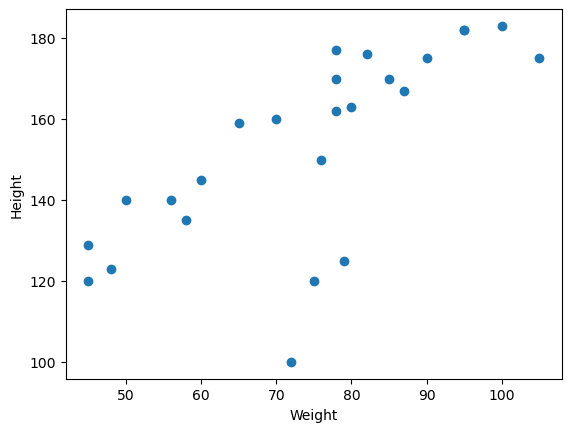

In [8]:
plt.scatter(df_raw['Weight'], df_raw['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

## Steps taken for the train model
* Dataset
* Divide the dataset into Dependant and Independant features
* Train test split of Dataset
* Standarization of dataset, specially for linear Regression.
* Train the data using Linear Regression

In [9]:
df= df_raw.copy()

In [10]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [25]:
# Dividing our data into dependant and independant features
X = df[['Weight'] ] # Independant feature
y = df['Height']  # Dependant feature

In [26]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [27]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    100
23    120
24    125
Name: Height, dtype: int64

### Train Test Split data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)  
# test_size is required because it will determine how data it will keep for the test purpose. 
# Here in our data it 0.20 means 20% of data will keep for the test purpose.
# The sequence of X_train and X_test, y_train and y_test should follow

In [30]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

In [31]:
y_train.shape, y_test.shape

((20,), (5,))

#### from these data we can see that datas are splitted for train and test

In [32]:
# Standarization of train independant data

from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train) 

# This will standarized the data set, calculate the mean and standard 
# deviation and finally standarized the the data.

X_test = scaler.transform(X_test)

# Here notable thing is that fit is not used in this test part. 

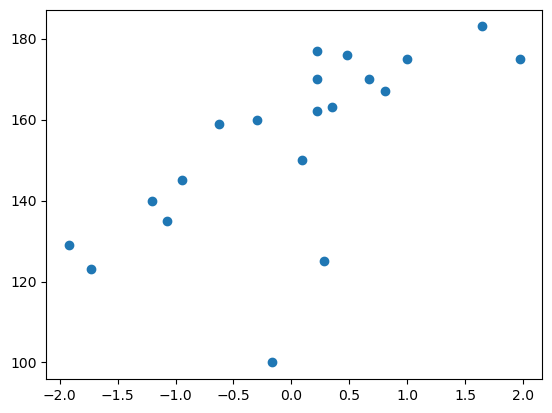

In [36]:
plt.scatter(X_train, y_train)

#### From this above plot we can see that our x axis data is changed that means it is standarized. 

# Train the simple linear regression model, why it is simple, because it has only one independant feature. 

In [38]:
from  sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
print("The coefficient of slope of the regression is: ", regression.coef_)

The coefficient of slope of the regression is:  [14.93134776]


In [45]:
print("Intercept of the regression is: ", regression.intercept_)

Intercept of the regression is:  154.2


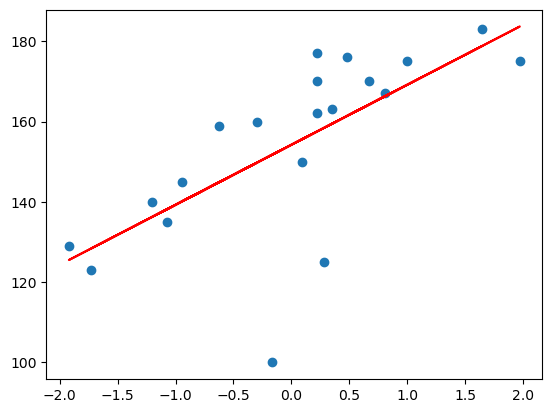

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = 'r')

In [49]:
# Prediction of test data

y_pred_test = regression.predict(X_test)


In [50]:
y_pred_test, y_test

(array([173.97168619, 130.35767254, 125.51167102, 154.58768012,
        173.97168619]),
 8     182
 16    140
 0     120
 23    120
 11    182
 Name: Height, dtype: int64)

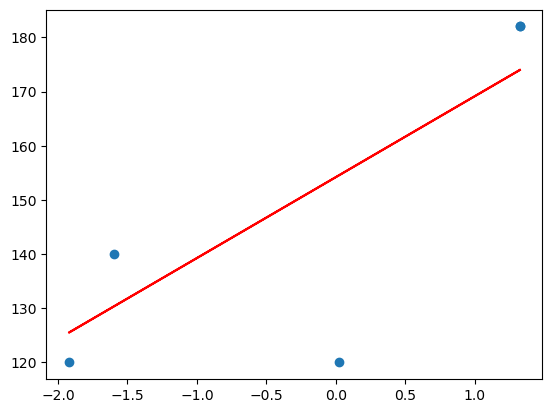

In [51]:
# Best fit line for the test data

plt.scatter(X_test, y_test)
plt.plot(X_test, regression.predict(X_test), color = 'r')

## Performance Metrics

## MSE, MAE, RMSE

## R square and adjusted R square

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
mse = mean_squared_error(y_test, y_pred_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred_test)

In [56]:
rmse = np.sqrt(mse)

In [57]:
print(mse)
print(mae)
print(rmse)

289.7136515643109
13.159661245470641
17.020976809933998


In [58]:
from sklearn.metrics import r2_score

In [59]:
score = r2_score(y_test, y_pred_test)
print(score)

0.6324177177675714


### Adjusted R-squared

In [60]:
1-(1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.5098902903567619

## The above mentioned all are the performance metrics, by these values we can understand how much the accuracy give this model.

### Let us see how our model works in our assumptions

In [61]:
# Our new data predict is 80 kg
scaled_weight = scaler.transform([[80]])
print(" Scaled weight is: ", scaled_weight)

 Scaled weight is:  [[0.35051636]]


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
print(regression.predict([scaled_weight[0]]))

[159.43368164]


## so,from this experiment we can say that for a 80KG weight of a man, the height will be 159.433 cm. 

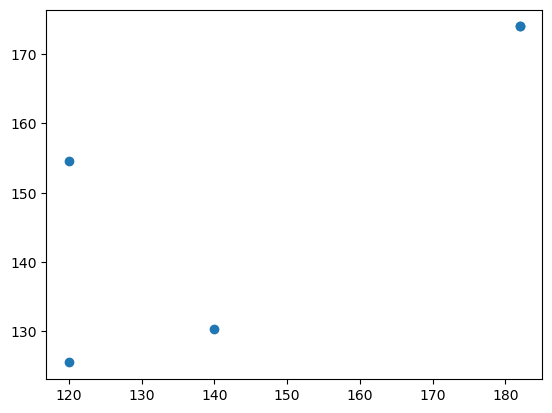

In [66]:
# Assumptions
# plot a scatter plot for the predictions
plt.scatter(y_test, y_pred_test)

## From the above plot we can see that this predicted line will be almost linear

In [67]:
# next assumption is Residuals
residuals = y_test - y_pred_test
residuals

8      8.028314
16     9.642327
0     -5.511671
23   -34.587680
11     8.028314
Name: Height, dtype: float64

C:\Users\moham\AppData\Local\Temp\ipykernel_9348\3172745473.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)


<Axes: xlabel='Height', ylabel='Density'>

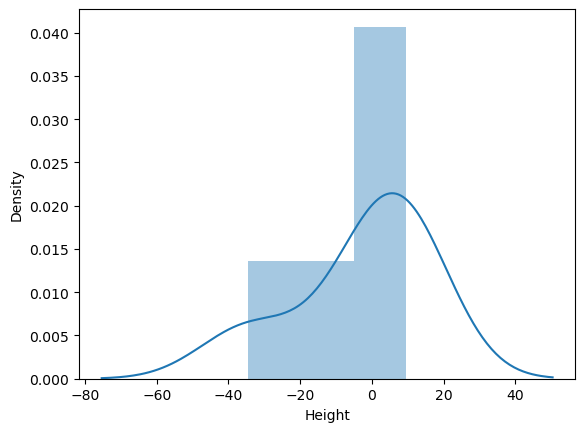

In [70]:
# To plot the residuals we can go for 
import seaborn as sns
sns.distplot(residuals, kde = True)

## as this plot showed a normal distribution curve so, we can say that it is a good model.

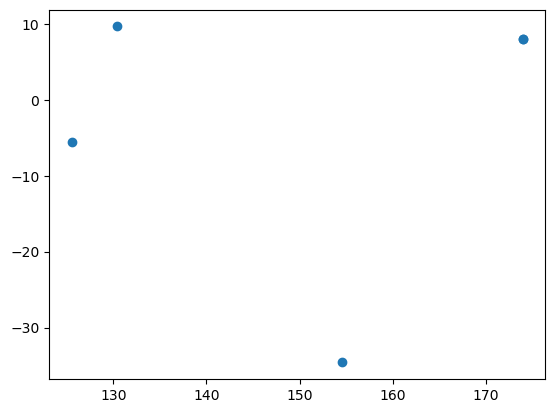

In [71]:
# next assumption:
# Scatter plot with respect to prediction and residuals
# these points will be uniformly distributed

plt.scatter(y_pred_test, residuals)
